## MNIST Evaluation 2 layer Dense ANN



In [19]:
%matplotlib inline

In [2]:
import warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings(action='once')


In [81]:
labels = [1,2,3,4,5,6,7,8,9,0]

In [15]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 


from matplotlib import pyplot as plt
from random import randint
import numpy as np

In [44]:


# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before processing to display
x_train_drawing = x_train
y_train_drawing = y_train
x_test_drawing = x_test
y_test_drawing = y_test


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
x_test_drawing

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Examine some of the data

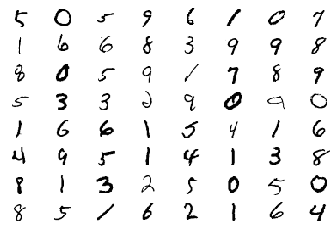

In [5]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

Simple ANN 1 hidden layer

In [6]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Train and evaluate

In [7]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



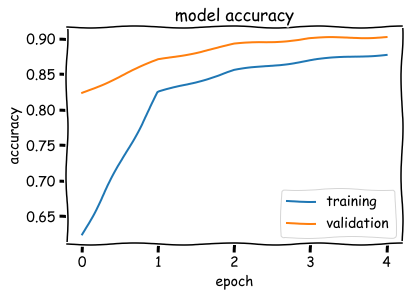

Test loss: 0.486
Test accuracy: 0.887


In [30]:
plt.xkcd()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [10]:
score=model.evaluate(x_test, y_test,verbose=1)
print (score,  "score")


10000/10000 [==============================] - 0s 17us/step
[0.4856373224258423, 0.8869] score


In [16]:
#predicting classes using MNIST test data

predicted_classes=model.predict_classes(x_test)
print (predicted_classes.shape, "predicted_classes.shape")
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

(10000,) predicted_classes.shape


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:47: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [17]:
print  (len(correct_indices), "no . of correct samples")
print (len(incorrect_indices), "no . of incorrect samples")
print (str((len(incorrect_indices)/float(len(y_test)))*100)+'%', "error percentage")

0 no . of correct samples
1 no . of incorrect samples
0.01% error percentage


In [20]:
#plotting graph of predicted test data
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.show()

<Figure size 432x288 with 0 Axes>

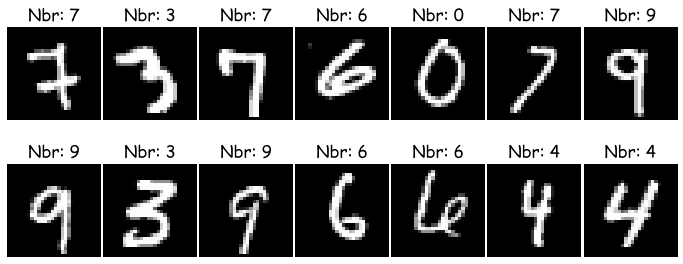

In [31]:
np.random.seed(365)

rand_14 = np.random.randint(0, x_train_drawing.shape[0],14)
sample_digits = x_train_drawing[rand_14]
sample_labels = y_train_drawing[rand_14]

# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('Nbr: %d' % sample_labels[image_index])
plt.show()
plt.close()


In [28]:
sample_labels

array([4, 9, 0, 4, 6, 3, 8, 5, 3, 6, 8, 7, 7, 9], dtype=uint8)

In [33]:
predictions = model.predict(x_test)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(y_test,axis=1)[:25]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


Incorrects: 1131  Rows:  10  Cols:  7


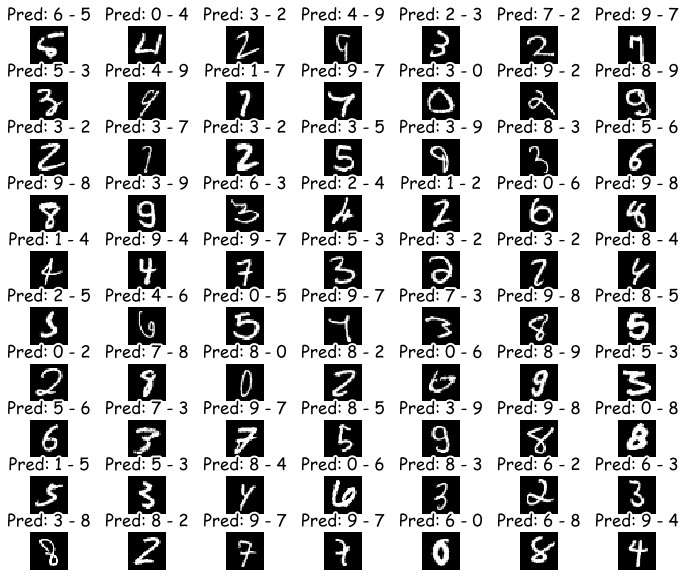

In [80]:
predictions = model.predict(x_test)

preds = np.argmax(predictions, axis=1)
trues = np.argmax(y_test, axis=1)

#print("Incorrects:", len(preds))

badpred= []
nbrincorrect = 0
for i in range(len(preds)):
    if preds[i] != trues[i]:
        nbrincorrect = nbrincorrect +1
        badpred.append(i)
#        print("label:",trues[i]," predict: ",preds[i])
            
#print(badpred)

num_cols = 7
#num_rows = nbrincorrect // num_cols
num_rows =10
print("Incorrects:", nbrincorrect," Rows: ",num_rows," Cols: ",num_cols)


f, ax = plt.subplots(num_rows, num_cols, figsize=(12,10),
                     gridspec_kw={'wspace':0.2, 'hspace':0.5}, 
                     squeeze=True)
count = 0
for r in range(num_rows):
    for c in range(num_cols):
        image_index = count
        ax[r,c].axis("off")
        ax[r,c].imshow(x_test_drawing[badpred[count]], cmap='gray')
        titstr = "Pred: "+str(preds[badpred[count]])+" - "+str(trues[badpred[count]])
        ax[r,c].set_title(titstr)
        count = count + 1
        '''if count >= 35:
            break'''
plt.show()
plt.close()

In [83]:
#test_predictions = model.predict_classes(x_test)
#len(test_predictions)

cm = confusion_matrix(trues,  preds,labels)
print(cm)

[[1103    3    5    1    1    4    3   15    0    0]
 [  16  868   46   15    3   16   13   31    8   16]
 [   2   21  919    2   19    5   12   17   11    2]
 [   3    7    1  871    0   18    3    8   69    2]
 [   5    5   76   10  679   27    7   51   17   15]
 [   3    4    1   17   17  882    4    2    0   28]
 [  18   29    4    9    1    1  896    5   63    2]
 [   8    7   48    9   27   26    8  801   28   12]
 [   4    6   20   21    1    0   29    8  911    9]
 [   0    2    6    1    9   13    2    7    1  939]]


C:\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


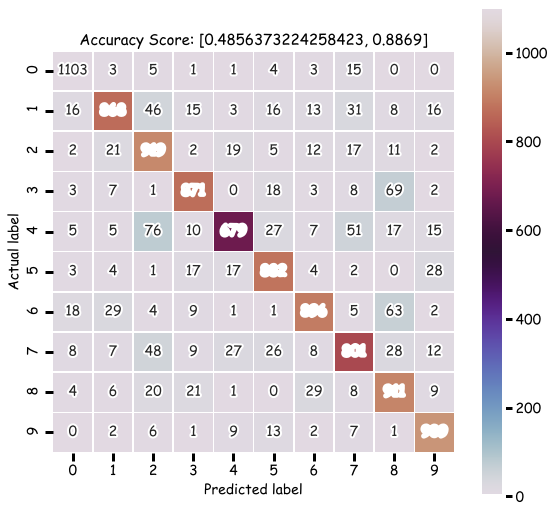

In [97]:
import seaborn as sns
plt.xkcd(0,0,0)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'twilight');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);